# Importing python packages

In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# Testing Sentiment Analysis (sample)

In [2]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

# Importing YouTube comments data

In [3]:
#Importing YouTube comments data
data = pd.read_csv('UScomments.csv');#opening the file UScomments

# Displaying first 5 rows of data

In [4]:
#Displaying the first 5 rows of the data
data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ������������������,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ����,3,0


In [5]:
#Finding the size of the data
data.shape

(467009, 4)

# Extracting 2000 random samples from the data

In [6]:
#Extracting 2000 random samples from the data
comm = data.sample(2000)
comm.shape

(2000, 4)

# Calculating Sentiment polarity for each comment

In [7]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

# Adding the Sentiment Polarity column to the data

In [8]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

# Converting the polarity values from continuous to categorical

In [9]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

# Displaying Positive comments

In [10]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
185356,LVPIM06bMJo,"he is too adorable , almost brought me to tears",0,0,1.0
146984,8ZRCdfaAIy0,"Even though it wasn't a review, this might've been the most honest review I've ever seen���",0,0,1.0
451827,x0GbpqxD42k,I just want to mention how awesome Bostonians are. At :07 they even drink beer in sync!,0,0,1.0
321851,r9-DM9uBtVI,Lol... quit it with these superhero movies! It's making me laugh! Your never gonna beat Marvel and I gotta admit Marvel is shit.,1,0,1.0
432567,KGQTkWJ5mU4,There is so much speculation and pure bullshit in this video,0,0,1.0
342626,_0d3XbH12cs,"Incredibly beautiful and soft simplicity in this video. it's perfect. I love the styling of clothes/hair/nature and vibe of this song. I'm excited for the album, especially if it's like this song...",0,0,1.0
292228,y_h_1uN2RQA,Loving this song.,0,0,1.0
458410,IZ5izPbcgG4,HAHA HES SO SHOOK FOR THE REST OF THE VIDEO,0,0,1.0
356525,udnGW3E1vxY,I lovr him he is such a good singer and his fianc�� is beautiful,0,0,1.0
485,cMKX2tE5Luk,Can't wait for this! It seems like a modern Ed Wood.,1,0,1.0


# Displaying Negative comments

In [11]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
317172,L_vQW3xQEhc,"i would legit shit myself if you made it Jeff buckley, Sam cooke,River phoenix or James dean",1,0,-1.0
465804,S9VIKOuZcds,This for real made me a bit sad.,1,0,-1.0
375743,0ceNfXrccbQ,If Hillary won this never would of came out!and all these victimswere not forced to fuck!now if they were drugged and rapped that's different or if forced but telling hot chics if you fuck me I'll...,5,1,-1.0
81100,RJuqdTXhDX4,iPhone 7+ is the last upgrade I will get with the iPhones. At least I can get a splitter so I can charge and use my earbuds while my husband is watching TV and I can watch the weeks before shows. ...,0,0,-1.0
149483,JU21shbaVBo,"I actually don't mind seeing the same animation again. I think it's pretty clever. Besides, even though I'm no animator, I think drawing different animation again and again could be pretty painful.",0,0,-1.0
246033,qy-UZ5B38-Y,"���After all, why have human interaction when you have dangerously overheating inanimate objects to keep you company.��� -Troye Sivan",0,0,-1.0
458821,JpTdK2kn6TA,Wtf is wrong with this guy,0,0,-1.0
362734,do-9G1s9LSY,wtf so now even guys will have to take Their effing time to prepare,0,0,-1.0
262408,x5Ps13AeXxQ,ohh fuCK,0,0,-1.0
6896,rHfyvSgvgoo,2019 for season 8 wtf guys cant wait so much time please kill me now and call lady melisandre and resurrect me when season 8 is out,1,0,-1.0


# Displaying Neutral comments

In [12]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
67847,6x62O8A8qHw,topher grace from that 70's show is that you?,0,0,0.0
187472,hEdvvTF5js4,Emotional,0,0,0.0
85178,xPS7bqBePSs,m��nh kh��ng vi���t ti���ng anh v�� nos kh��ng n��i l��n h���t c���m x��c c���a m��nh. nh���c c��i ����o g�� m�� hay v���y !!!!,0,0,0.0
24137,o0hMhEsMUs0,Segurando as l��grimas ! Perfeito,0,0,0.0
116537,hNsUtZmWgdg,I'm seeing the plane in a fire which crashed. Where is the laser shot?,0,0,0.0
449700,upd8nVJr7lc,Country music is embarrassing,0,0,0.0
457721,crY-q80MfJU,Different ketchup taste test,0,0,0.0
45807,n4wFyyW71zs,I miss the Sometime Last Night style but... this still being zukulent,0,0,0.0
103016,J_ub7Etch2U,To hell with hellos,0,0,0.0
24383,eoArC99zm1M,Whalawhat?,0,0,0.0


# Calculating the count of Positive, Negative & Neutral comments

 1.0    868
 0.0    819
-1.0    313
Name: pol, dtype: int64

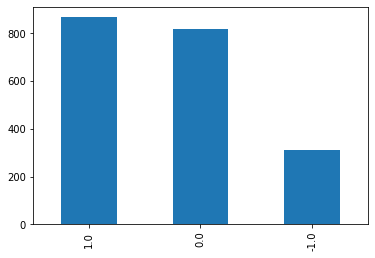

In [13]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()